In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.optimize import curve_fit
import astropy.units as U

parent_dir=os.path.dirname(os.getcwd())
data = pd.read_csv(os.path.join(parent_dir, 'brightnes','CO10.dat'), sep='\t')
data


,#redshift,Luminosity(K km s-1 pc2),Sigma(Jy),luminosity distance(Mpc)
0,0.053,1.445440e+09,0.054663,238.578180
1,0.064,8.317638e+08,0.021454,290.390050
2,0.068,1.548817e+09,0.035318,309.421719
3,0.078,2.137962e+09,0.036875,357.442552
4,0.082,3.548134e+09,0.055268,376.826406
...,...,...,...,...
62,2.846,8.709636e+10,0.001149,24410.653651
63,3.094,2.398833e+11,0.002754,27001.725826
64,3.532,1.174898e+11,0.001086,31655.448098
65,3.796,1.819701e+11,0.001499,34502.645233


In [2]:
def read_line_emission_csv(path_line_emission_csv):
    """
    Read the csv file in which are stored the line emission's rest frequency.
    
    Parameter: 
    path_line_emission_csv (str): Path to file.csv within there are the line emission's rest frequency.
    
    Return:
    pd.DataFrame : Dataframe with line names and rest frequencies.
    """
    db_line = pd.read_csv(path_line_emission_csv, sep = "\t")
    return db_line
db_line = read_line_emission_csv(os.path.join(parent_dir, 'metadata', 'line_emission.csv'))
db_line


,line_emission,rest_freq(GHz)
0,CO(1-0),115.27100
1,CO(2-1),230.53800
2,H(1-0),14.40500
3,H(2-1),28.20536
4,O(3-2),495892.30000


In [3]:
def get_line_rest_frequency(line_name):
    """
    Takes as input the line name and extract from the dataframe the rest frequency of said line

    Parameter:
    line_name (str): The line name of the wanted rest frequency.

    Return:
    rest_frequency (float): The rest frequency of the selected line name.
    """
    db_line = read_line_emission_csv(os.path.join(parent_dir, 'metadata', 'line_emission.csv'))
    if line_name not in db_line["line_emission"].to_list():
        raise ValueError(f"The line name, '{line_name}', cannot be found in the dataframe.")
    rest_frequency = db_line[db_line["line_emission"]==line_name]["rest_freq(GHz)"]
    return rest_frequency
line_name = input("Chose the line emission name among the following lines: CO(1-0), CO(2-1), H(1-0), H(2-1), O(3-2)")
rest_frequency = get_line_rest_frequency(line_name)
rest_frequency


0    115.271
Name: rest_freq(GHz), dtype: float64

In [4]:
def luminosity_to_jy(velocity, data, line_name):
        """
        This function takes as input a pandas db containing luminosities in K km s-1 pc2, redshifts, and luminosity distances in Mpc, 
        and returns the brightness values in Jy, for the chosen line emission name.
        
        Parameters:
        velocity (float): The velocity dispersion assumed for the line (Km s-1).
        data (pandas.DataFrame): A pandas DataFrame containing the data: Luminosity(K km s-1 pc2),#redshift,luminosity distance(Mpc).
        line_name (str): The choosen line emission name.

        Output:
        sigma: numpy.ndarray: An array of brightness values in Jy.
        """
        def sigma_CO10(df, velocity, rest_frequency):
                alpha = 3.255e7
                return df['Luminosity(K km s-1 pc2)'] * ( (1 + df['#redshift']) * rest_frequency **2) / (alpha * velocity * (df['luminosity distance(Mpc)']**2))
        def sigma_CO21(df, velocity, rest_frequency):
                alpha = 3.255e7
                return df['Luminosity(K km s-1 pc2)'] * ( (1 + df['#redshift']) * rest_frequency **2) / (alpha * velocity * (df['luminosity distance(Mpc)']**2))
        def sigma_H10(df, velocity, rest_frequency):
                alpha = 3.255e7
                return df['Luminosity(K km s-1 pc2)'] * ( (1 + df['#redshift']) * rest_frequency **2) / (alpha * velocity * (df['luminosity distance(Mpc)']**2))
        def sigma_H21(df, velocity, rest_frequency):
                alpha = 3.255e7
                return df['Luminosity(K km s-1 pc2)'] * ( (1 + df['#redshift']) * rest_frequency **2) / (alpha * velocity * (df['luminosity distance(Mpc)']**2))
        def sigma_O32(df, velocity, rest_frequency):
                alpha = 3.255e7
                return df['Luminosity(K km s-1 pc2)'] * ( (1 + df['#redshift']) * rest_frequency **2) / (alpha * velocity * (df['luminosity distance(Mpc)']**2))
        rest_frequency = get_line_rest_frequency(line_name)
        function = {
                "CO(1-0)": (data, sigma_CO10),
                "CO(2-1)": (data, sigma_CO21),
                "H(1-0)": (data, sigma_H10),
                "H(2-1)": (data, sigma_H21),
                "O(3-2)": (data, sigma_O32),
                }
        sigma = data.apply(lambda row: function.get(line_name)[1](row, velocity, rest_frequency), axis=1)
        sigma = np.concatenate(sigma.to_numpy())                                                                                                
        return sigma
        
sigma = luminosity_to_jy(200,data,line_name)
sigma

array([0.05457906, 0.02142088, 0.03526377, 0.03681844, 0.0551828 ,
       0.02071   , 0.00569119, 0.01499956, 0.01118191, 0.00893817,
       0.00071072, 0.00138579, 0.00193777, 0.00078741, 0.00101722,
       0.00095796, 0.0014286 , 0.00218765, 0.00297852, 0.00101944,
       0.0002669 , 0.00125294, 0.0024865 , 0.00051741, 0.00115266,
       0.01902894, 0.0029395 , 0.00108183, 0.00096754, 0.00098278,
       0.00048421, 0.01745475, 0.00215859, 0.00108138, 0.00237939,
       0.00182244, 0.00157717, 0.00111455, 0.00122208, 0.00176644,
       0.0006563 , 0.00078201, 0.0020479 , 0.00074062, 0.00261231,
       0.00100189, 0.0013414 , 0.00093689, 0.00155361, 0.0010373 ,
       0.00091375, 0.0005244 , 0.00060712, 0.00182282, 0.00041077,
       0.00182193, 0.0016181 , 0.00042065, 0.00083243, 0.00156054,
       0.00132154, 0.00102462, 0.00114739, 0.00274931, 0.00108456,
       0.00149635, 0.00104621])

In [5]:
def exponential_func(x, a, b):
        """
        Exponential function used to fit the data.
        """
        return a * np.exp(-b * x)

In [6]:
def params_of_distr(Data_path, red_col_name, sigma):
    """ 
    This function takes as input the path to file csv of the distribution of the chosen line emission.
    It's require to specify the redshift coloumn name and luminosity values (sigma).

    Parameters: 
    Data_path (str) : Path to the csv file of the chosen line emission.
    red_col_name (str) : Coloumn name of redshift values of the distribution. 
    sigma (float) : Luminosity values of distribution in Jy. 

    Return: 
    popt, pcov (float) : The parameters of the distribution.

    """
    data=pd.read_csv(Data_path, sep='\t')
    redshift = data[red_col_name].values
    popt, pcov = curve_fit(exponential_func, redshift, sigma)

    return popt, pcov 
popt, pcov = params_of_distr(os.path.join(parent_dir, 'brightnes', 'CO10.dat'),'#redshift',sigma)
popt

array([ 0.09085305, 12.36314195])

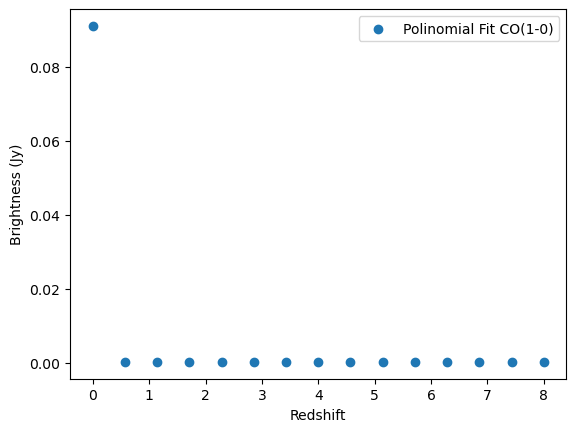

,Redshift,Brightness(Jy)
0,0.000000,0.091120
1,0.571429,0.000345
2,1.142857,0.000267
3,1.714286,0.000267
4,2.285714,0.000267
5,2.857143,0.000267
6,3.428571,0.000267
7,4.000000,0.000267
8,4.571429,0.000267
9,5.142857,0.000267


In [7]:
def sample_from_given_line_name(n, popt, pcov, line_name, min_redshift, max_redshift):
    """
    Gives n samples of brightness values based on an exponential fit to the data.

    Parameters:
    n (int) : Number of samples to generate.
    line_name (str) : The line emission name picked.
    velocity (float) :  Velocity dispersion assumed for the given line.
    min_redshift, max_redshift (float) : The redshift range 

    Return:
    pd.DataFrame: A DataFrame into which sampled brightness values and corresponding redshifts are crammed.
    """
    # Generate evenly spaced redshifts for sampling
    np.random.seed(42)
    sampled_redshifts = np.linspace(min_redshift, max_redshift, n)
    params = {
            "CO(1-0)": (popt, pcov),
            "CO(2-1)": (popt, pcov),
            "H(1-0)": (popt, pcov),
            "H(2-1)": (popt, pcov),
            "O(3-2)": (popt, pcov),
            }
    
    popt, pcov = params.get(line_name)
    # Use the fitted parameters to calculate the sampled brightness values
    sampled_sigma = exponential_func(sampled_redshifts, *popt) + np.min(sigma)
    plt.scatter(sampled_redshifts, sampled_sigma, label=f'Polinomial Fit {line_name}')
    plt.xlabel('Redshift')
    plt.ylabel('Brightness (Jy)')
    plt.legend()
    plt.show()
    # Return the sampled brightness values and the corresponding redshifts
    return pd.DataFrame(zip(sampled_redshifts, sampled_sigma), columns=['Redshift', 'Brightness(Jy)'])

db = sample_from_given_line_name(15,popt,pcov, line_name,0,8)
db